In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.sparse.linalg import eigs

In [31]:
def coordToIdx(x,y,N):
    return x + y*N

def vec2mat(x,N):
    mat = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            idx = coordToIdx(i,j,N)
            mat[i,j] = x[idx]
    return mat
def plotContour(matrix,N): 
    plt.contourf(np.linspace(0,1,N),np.linspace(0,1,N),matrix)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.colorbar()
    plt.show()
def generateLaplacianMatrix2D(N):
	h = 1/N
	#assembly of the matrix second order FD
	A = sparse.diags([1.0,1.0, -4.0, 1.0,1.0], [-N,-1, 0, 1,N], shape=(N*N, N*N),format = "csr")

	#assembly of the matrix fourth order FD 
	#A = sparse.diags([-1,-1, 4, -1,-1], [-N,-1, 0, 1,N], shape=(N*N, N*N),format = "csr")
    
	return A/(h**2)

def generateLaplacianMatrix1D(N):
	h = 1/N

    #assembly of the matrix second order FD
	#A = sparse.diags([1.0, -4.0, 1.0], [-1, 0, 1], shape=(N, N),format = "csr")

	#assembly of the matrix sixth order FD
	A = sparse.diags([1.0/90.0, -3.0/20, 3.0/2.0, -49.0/18.0, 3.0/2.0, -3.0/20, 1.0/90], [-3,-2,-1, 0, 1,2,3], shape=(N, N),format = "csr")

	return A/(h**2)

def generateLoadVector(const,N):
    return np.ones(N*N)*const

def argand(a):
    import matplotlib.pyplot as plt
    import numpy as np
    for x in range(len(a)):
        plt.plot([0,a[x].real],[0,a[x].imag],'ro-',label='python')
    limit=np.max(np.ceil(np.absolute(a))) # set limits for axis
    plt.xlim((-limit,limit))
    plt.ylim((-limit,limit))
    plt.ylabel('Imaginary')
    plt.xlabel('Real')
    plt.show()

# Solve 1D Laplace eigenvalue problem:

$\frac{\partial^2 u}{\partial x^2}(x) = \lambda u(x)$

$u(0) = u(1) = 0 $ 

$\Omega = [0,1] $

Use a second order finite difference of the second derivative such that the problem becomes :

$Au = \lambda u$

where $A \in R^{N \times N}$ a tridiagonal matrix.

### Analytic solution 
$\lambda < 0$

$u(x) = sin({n \pi}x)$


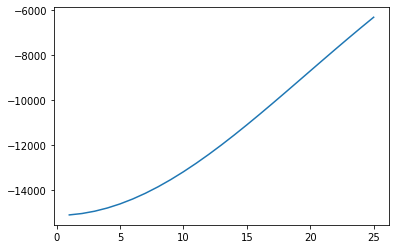

In [36]:
N = 50
A = generateLaplacianMatrix1D(N)
vals, vecs = eigs(A,k = N//2)
plt.plot(np.linspace(1,N//2,N//2),np.real(vals))

Lambda 0 = -15090.412659858612
Lambda 1 = -15028.486162685373
Lambda 2 = -14925.835672331454
Lambda 3 = -14783.292941837111
Lambda 4 = -14602.005113909805
Lambda 5 = -14383.41786404983


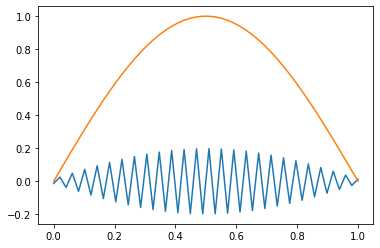

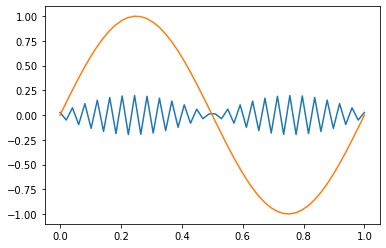

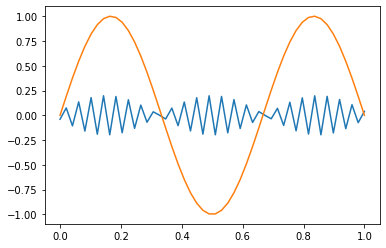

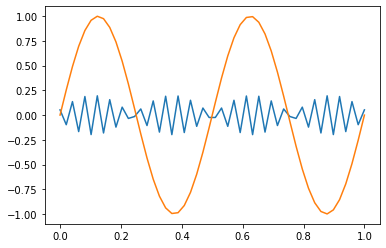

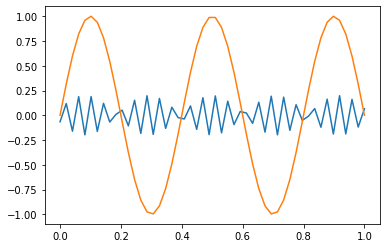

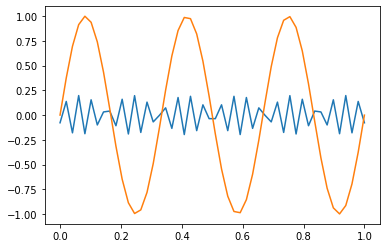

In [37]:
for i in range(6):
    print("Lambda {} = {}".format(i,np.real(vals[i])))
    plt.figure()
    plt.plot(np.linspace(0,1,N),np.real(vecs[:,i]))
    x = np.linspace(0,1,N)
    plt.plot(x,[np.sin((i+1)*3.1415*xi) for xi in x])

# Solve 2D Laplace eigenvalue problem:

$\frac{\partial^2 u}{\partial x^2}(x,y) + \frac{\partial^2 u}{\partial y^2}(x,y) = \lambda u(x,y)$

$u(x,y) = 0 $ on $\partial \Omega$

$\Omega = [0,1] \times [0,1]$

Use a second order finite difference of the second derivative such that the problem becomes :

$Au = \lambda u$

where $A \in R^{N^2 \times N^2}$ a tridiagonal matrix.

In [23]:
N = 50
A = generateLaplacianMatrix2D(N)
vals, vecs = eigs(A)

Lambda 0 = -19980.610669226502


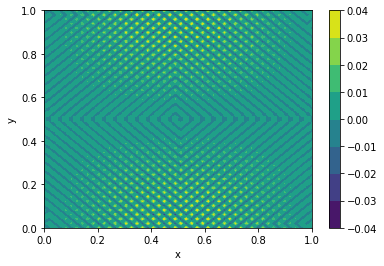

Lambda 1 = -19980.656837708546


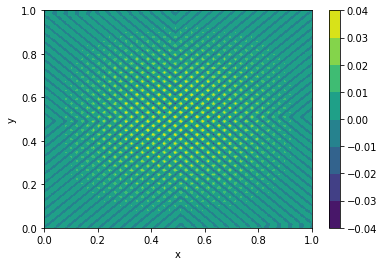

Lambda 2 = -19952.074568916632


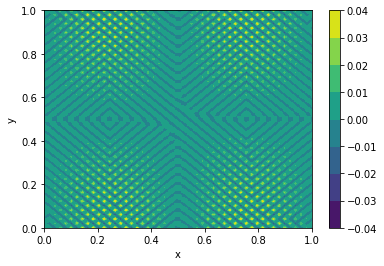

Lambda 3 = -19952.251434145688


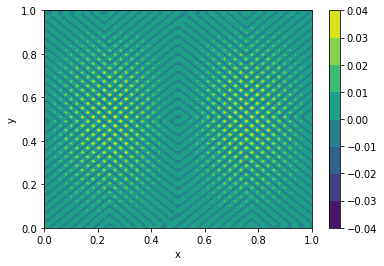

Lambda 4 = -19905.03383698726


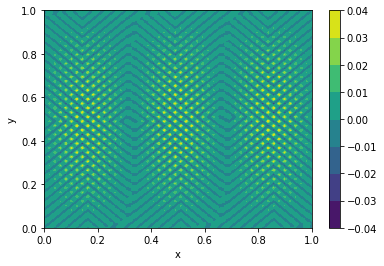

Lambda 5 = -19904.686590408757


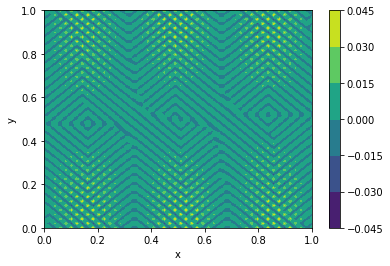

In [24]:
for i in range(6):
    mat = vec2mat(np.real(vecs[:,i]),N)
    print("Lambda {} = {}".format(i,np.real(vals[i])))
    plotContour(mat,N)